## Transform the data from event-based to user-based

In [1]:
## Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [2]:
## show Chinese character
## source: https://jdhao.github.io/2017/05/13/guide-on-how-to-use-chinese-with-matplotlib/
##         https://stackoverflow.com/questions/25561009/how-do-you-i-use-mandarin-characters-in-matplotlib

import matplotlib as mpl
font_name = "STKaiti"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

# plt.text(0.5, 0.5, s=u'测试')
# plt.show()

In [4]:
# df = pd.read_csv('../data/sensors.csv', dtype='unicode')
df = pd.read_csv('../data/sensors_cleaned.csv')

In [5]:
## save a backup df
df_backup = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75092 entries, 0 to 75091
Data columns (total 70 columns):
_nocache                               75092 non-null int64
distinct_id                            75092 non-null object
event                                  75092 non-null object
jssdk_error                            75092 non-null object
lib.$lib                               75092 non-null object
lib.$lib_method                        75092 non-null object
lib.$lib_version                       75092 non-null object
properties.$browser                    75092 non-null object
properties.$browser_version            75092 non-null object
properties.$first_browser_language     75092 non-null object
properties.$first_referrer             75092 non-null object
properties.$first_referrer_host        75092 non-null object
properties.$first_visit_time           75092 non-null object
properties.$ip                         75092 non-null object
properties.$is_first_day              

In [7]:
df.head()

,_nocache,distinct_id,event,jssdk_error,lib.$lib,lib.$lib_method,lib.$lib_version,properties.$browser,properties.$browser_version,properties.$first_browser_language,...,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type
0,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_referrerUrl,no_requestBtn,no_result,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,no_url_path,no_verification_code,1488791047953,track
1,3040562711955,9939d3e087bca29c42334d96dccd25ca0e06652a,no_action,no_jssdk_error,js,code,1.6.20,no_brower,no_brower_version,zh-CN,...,no_referrerUrl,no_requestBtn,no_result,no_session_page_url,no_siteUrl,no_site_url,no_url_path,no_verification_code,1490958296645,profile_set_once
2,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_referrerUrl,no_requestBtn,no_result,https://sensorsdata.cn/?ch=demo,no_siteUrl,no_site_url,no_url_path,no_verification_code,1488791050856,track
3,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_referrerUrl,2.0,no_result,https://sensorsdata.cn/?ch=demo,no_siteUrl,no_site_url,no_url_path,no_verification_code,1488791051772,track
4,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_referrerUrl,2.0,no_result,https://sensorsdata.cn/?ch=demo,no_siteUrl,no_site_url,no_url_path,no_verification_code,1488791056032,track


### Time-series variables

In [8]:
# convert the Unix time to the recongnizable time format

from datetime import datetime

time_formatted = []

for i in range(len(df)):
    ds = int(df["time"][i])
    ds /= 1000
    ds_new = datetime.utcfromtimestamp(ds).strftime('%Y-%m-%d %H:%M:%S')
    time_formatted.append(ds_new)

df["time_formatted"] = pd.Series(time_formatted)

#### There are two time variables, first_visit_time and time_formatted. Find the (1) date, (2) day_of_week, and (3) hour_of_day.

In [29]:
## time_formatted to date

time_formatted_date = []
for i in range(len(df['time_formatted'])):
        date = df['time_formatted'][i][0:10]
        time_formatted_date.append(date)

df["time_formatted_date"] = pd.Series(time_formatted_date)

In [31]:
## time_formatted to day_of_week

import datetime

day_of_week = []
for i in range(len(df['time_formatted'])):
    year = df['time_formatted'][i][0:4]
    month = df['time_formatted'][i][5:7]
    day = df['time_formatted'][i][8:10]
    day_of_week.append(datetime.date(int(year), int(month), int(day)).weekday())
    
df["day_of_week"] = pd.Series(day_of_week)

In [33]:
## time_formatted to hour_of_day

hour_of_day = []
for i in range(len(df['time_formatted'])):
    hour = df['time_formatted'][i][11:13]
    hour_of_day.append(int(hour))

df["hour_of_day"] = pd.Series(hour_of_day)

In [35]:
## properties.$first_visit_time to date

first_visit_time_date = []
for i in range(len(df['properties.$first_visit_time'])):
    if df['properties.$first_visit_time'][i] != 'no_first_visit_time':
        date = df['properties.$first_visit_time'][i][0:10]
        first_visit_time_date.append(date)
        
df["properties.$first_visit_time_date"] = pd.Series(first_visit_time_date)

In [36]:
df.head()

,_nocache,distinct_id,event,jssdk_error,lib.$lib,lib.$lib_method,lib.$lib_version,properties.$browser,properties.$browser_version,properties.$first_browser_language,...,properties.site_url,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date
0,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_site_url,no_url_path,no_verification_code,1488791047953,track,2017-03-06 09:04:07,2017-03-06,0,9,2017-03-06
1,3040562711955,9939d3e087bca29c42334d96dccd25ca0e06652a,no_action,no_jssdk_error,js,code,1.6.20,no_brower,no_brower_version,zh-CN,...,no_site_url,no_url_path,no_verification_code,1490958296645,profile_set_once,2017-03-31 11:04:56,2017-03-31,4,11,2017-03-06
2,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_site_url,no_url_path,no_verification_code,1488791050856,track,2017-03-06 09:04:10,2017-03-06,0,9,2017-03-06
3,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_site_url,no_url_path,no_verification_code,1488791051772,track,2017-03-06 09:04:11,2017-03-06,0,9,2017-03-06
4,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_site_url,no_url_path,no_verification_code,1488791056032,track,2017-03-06 09:04:16,2017-03-06,0,9,2017-03-06


In [48]:
# convert time-series information to datetime data type
df['time_formatted_date'] = pd.to_datetime(df['time_formatted_date'])
df['properties.$first_visit_time_date'] = pd.to_datetime(df['properties.$first_visit_time_date'])

In [49]:
# construct a new df to experiment on the time-series 
df_timestamp = df[['time_formatted_date', 'properties.$first_visit_time_date']].copy()

In [50]:
df_timestamp['count'] = 1

In [51]:
df_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75092 entries, 0 to 75091
Data columns (total 3 columns):
time_formatted_date                  75092 non-null datetime64[ns]
properties.$first_visit_time_date    9419 non-null datetime64[ns]
count                                75092 non-null int64
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.7 MB


In [52]:
df_timestamp.head(10)

,time_formatted_date,properties.$first_visit_time_date,count
0,2017-03-06,2017-03-06,1
1,2017-03-31,2017-03-06,1
2,2017-03-06,2017-03-06,1
3,2017-03-06,2017-03-06,1
4,2017-03-06,2017-03-06,1
5,2017-03-06,2017-03-06,1
6,2017-03-06,2017-03-06,1
7,2017-03-06,2017-03-06,1
8,2017-03-06,2017-03-06,1
9,2017-03-06,2017-03-06,1


In [53]:
df_timestamp['properties.$first_visit_time_date'].value_counts()

2017-03-09    1388
2017-03-14    1374
2017-03-13    1289
2017-03-08    1268
2017-03-07    1235
2017-03-10    1147
2017-03-12     603
2017-03-11     566
2017-03-06     478
2017-03-15      53
2017-03-02       4
2017-02-23       2
2017-02-11       1
2017-03-04       1
2017-03-21       1
2017-02-27       1
2015-03-14       1
2013-03-08       1
2017-02-21       1
2010-03-11       1
2017-03-05       1
2013-03-13       1
2008-04-22       1
2016-12-27       1
Name: properties.$first_visit_time_date, dtype: int64

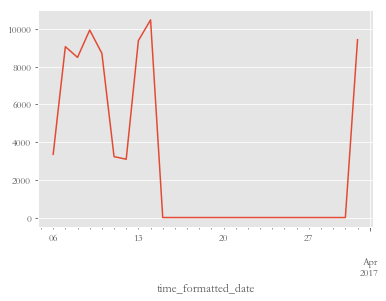

In [54]:
df_timestamp = df_timestamp.set_index('time_formatted_date')
df_timestamp['count'].resample("1D").sum().plot()

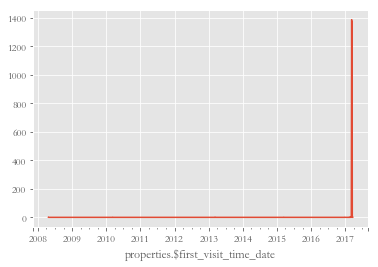

In [55]:
df_timestamp = df_timestamp.set_index('properties.$first_visit_time_date')
df_timestamp['count'].resample("1D").sum().plot()

#### deal with the replicated options in first_browser_language

In [40]:
df['properties.$first_browser_language'].value_counts()

no_first_browser_language    65944
zh-CN                         7137
zh-cn                         1304
en-US                          549
en-us                           72
en-GB                           19
C                               18
zh-TW                           12
ru                              10
zh-tw                            8
ja-jp                            4
ko                               2
ru-RU                            2
ja                               2
zh                               2
en-gb                            1
de-de                            1
zh-HK                            1
ja-JP                            1
en-sg                            1
fr                               1
hy-AM                            1
Name: properties.$first_browser_language, dtype: int64

In [41]:
## zh-CN and zh-cn are the same
## en-US and en-us are the same
## en-GB and en-gb are the same
## zh-TW and zh-tw are the same
## ja-JP, ja and ja-jp are the same
## ru-RU and ru are the same

## merge all zh-CN, zh-cn, zh-TW, zh-tw, zh-HK, zh to zh
## merge all en-US, en-us, en-GB, en-gb, en-sg to en
## others to others

df['properties.$first_browser_language'] = df['properties.$first_browser_language'].replace(['zh-CN', 'zh-cn', 'zh-TW', 
                                                                                            'zh-tw', 'zh-HK'], 'zh')

df['properties.$first_browser_language'] = df['properties.$first_browser_language'].replace(['en-US', 'en-us', 'en-GB', 
                                                                                             'en-gb', 'en-sg'], 'en')

df['properties.$first_browser_language'] = df['properties.$first_browser_language'].replace(['C', 'ru', 'ja-jp', 'ko', 'ru-RU',
                                                                                            'ja', 'de-de', 'ja-JP', 'fr', 'hy-AM'
                                                                                            ], 'others')

In [42]:
df['properties.$first_browser_language'].value_counts()

no_first_browser_language    65944
zh                            8464
en                             642
others                          42
Name: properties.$first_browser_language, dtype: int64

## Transform data from <font color='blue'> event-based </font>  to <font color='blue'> user-based </font> 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75092 entries, 0 to 75091
Data columns (total 75 columns):
_nocache                               75092 non-null int64
distinct_id                            75092 non-null object
event                                  75092 non-null object
jssdk_error                            75092 non-null object
lib.$lib                               75092 non-null object
lib.$lib_method                        75092 non-null object
lib.$lib_version                       75092 non-null object
properties.$browser                    75092 non-null object
properties.$browser_version            75092 non-null object
properties.$first_browser_language     75092 non-null object
properties.$first_referrer             75092 non-null object
properties.$first_referrer_host        75092 non-null object
properties.$first_visit_time           75092 non-null object
properties.$ip                         75092 non-null object
properties.$is_first_day              

In [59]:
df.head(5)

,_nocache,distinct_id,event,jssdk_error,lib.$lib,lib.$lib_method,lib.$lib_version,properties.$browser,properties.$browser_version,properties.$first_browser_language,...,properties.site_url,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date
0,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_site_url,no_url_path,no_verification_code,1488791047953,track,2017-03-06 09:04:07,2017-03-06,0,9,2017-03-06
1,3040562711955,9939d3e087bca29c42334d96dccd25ca0e06652a,no_action,no_jssdk_error,js,code,1.6.20,no_brower,no_brower_version,zh,...,no_site_url,no_url_path,no_verification_code,1490958296645,profile_set_once,2017-03-31 11:04:56,2017-03-31,4,11,2017-03-06
2,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_site_url,no_url_path,no_verification_code,1488791050856,track,2017-03-06 09:04:10,2017-03-06,0,9,2017-03-06
3,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_site_url,no_url_path,no_verification_code,1488791051772,track,2017-03-06 09:04:11,2017-03-06,0,9,2017-03-06
4,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,no_jssdk_error,js,code,1.6.20,chrome,56.0,no_first_browser_language,...,no_site_url,no_url_path,no_verification_code,1488791056032,track,2017-03-06 09:04:16,2017-03-06,0,9,2017-03-06


In [60]:
df.drop(['_nocache', 'jssdk_error', 'lib.$lib', 'lib.$lib_method', 'lib.$lib_version',
         'properties.$browser_version'], axis=1, inplace=True)
df.head(5)

,distinct_id,event,properties.$browser,properties.$first_browser_language,properties.$first_referrer,properties.$first_referrer_host,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,...,properties.site_url,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date
0,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,chrome,no_first_browser_language,no_first_referrer,no_first_referrer_host,no_first_visit_time,219.135.131.99,True,False,...,no_site_url,no_url_path,no_verification_code,1488791047953,track,2017-03-06 09:04:07,2017-03-06,0,9,2017-03-06
1,9939d3e087bca29c42334d96dccd25ca0e06652a,no_action,no_brower,zh,no_first_referrer,no_first_referrer_host,2017-03-06 17:04:10.999,no_ip,no_is_first_day,no_is_first_time,...,no_site_url,no_url_path,no_verification_code,1490958296645,profile_set_once,2017-03-31 11:04:56,2017-03-31,4,11,2017-03-06
2,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,chrome,no_first_browser_language,no_first_referrer,no_first_referrer_host,no_first_visit_time,111.204.198.242,True,True,...,no_site_url,no_url_path,no_verification_code,1488791050856,track,2017-03-06 09:04:10,2017-03-06,0,9,2017-03-06
3,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,chrome,no_first_browser_language,no_first_referrer,no_first_referrer_host,no_first_visit_time,111.204.198.242,True,False,...,no_site_url,no_url_path,no_verification_code,1488791051772,track,2017-03-06 09:04:11,2017-03-06,0,9,2017-03-06
4,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,chrome,no_first_browser_language,no_first_referrer,no_first_referrer_host,no_first_visit_time,111.204.198.242,True,False,...,no_site_url,no_url_path,no_verification_code,1488791056032,track,2017-03-06 09:04:16,2017-03-06,0,9,2017-03-06


#### Let's see how may users have multiple events

In [66]:
id = pd.DataFrame(df['distinct_id'].value_counts())
print("number of users who have only one events: %d" % len(id.loc[id['distinct_id'] == 1]))
print("number of users who have multiple events: %d" % len(id.loc[id['distinct_id'] > 1]))

number of users who have only one events: 590
number of users who have multiple events: 11166


#### For the users who have more than one events, some actions are needed

#### Groupy by distinct_id

In [133]:
grouped = df.groupby(['distinct_id']).count()
grouped = grouped.reset_index()
grouped.head(5)

,distinct_id,event,properties.$browser,properties.$first_browser_language,properties.$first_referrer,properties.$first_referrer_host,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,...,properties.site_url,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0


#### deal with event
* some users have multiple events, how to deal with them is a problem of concern 
* if the user has formSubmit or clickSubmit, we consider that user has signed up
* each event is one visit, so the number of event can be considered as another feature number_of_visit

In [134]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
no_action                 9419
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

In [135]:
## rename event to number_of_visit as a new feature
grouped = grouped.rename(columns={'event': 'number_of_visit'})
grouped.head(5)

,distinct_id,number_of_visit,properties.$browser,properties.$first_browser_language,properties.$first_referrer,properties.$first_referrer_host,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,...,properties.site_url,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0


In [126]:
## write a function to take the most frequent one as the begavior for the user who has multiple events
## if the most frequent one is "unknow" and all are "unknow", take "unknown"
## if the most frequent one is "unknow" and there are others, take the second frequent one

def take_most_frequent(col, feat):
    column = col
    name = feat
    f = []
    for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id][column]
        if a.mode()[0] == ('no_' + feat):
            if len(set(a)) == 1:
                b = ('no_' + feat)
            else:
                b = a.value_counts().index.values.tolist()[1]
        else:
            b = a.mode()[0]
        f.append(b)
    return f

In [127]:
print(take_most_frequent('properties.$browser', 'browser'))

['qq', 'chrome', 'chrome', 'qq', 'no_brower', 'chrome', 'chrome', 'na', 'micromessenger', 'no_brower', 'chrome', 'sogou', 'chrome', 'firefox', 'safari', 'chrome', 'uc', 'safari', 'firefox', 'micromessenger', 'chrome', 'chrome', 'chrome', 'chrome', 'sogou', 'chrome', 'sogou', 'edge', 'uc', 'qq', 'chrome', 'safari', 'mi', 'no_brower', 'chrome', 'safari', 'safari', 'chrome', 'chrome', 'chrome', 'chrome', 'chrome', 'safari', 'safari', 'qq', 'ie', 'chrome', 'chrome', 'ie', 'qq', 'chrome', 'chrome', 'no_brower', 'chrome', 'chrome', 'chrome', 'chrome', 'chrome', 'sogou', 'chrome', 'sogou', 'firefox', 'chrome', 'chrome', 'chrome', 'chrome', 'qq', 'safari', 'no_brower', 'chrome', 'safari', 'chrome', 'micromessenger', 'no_brower', 'no_brower', 'chrome', 'chrome', 'chrome', 'no_brower', 'qq', 'chrome', 'chrome', 'chrome', 'chrome', 'micromessenger', 'chrome', 'micromessenger', 'chrome', 'chrome', 'chrome', 'no_brower', 'na', 'sogou', 'safari', 'edge', 'sogou', 'firefox', 'ie', 'uc', 'no_brower', 

#### deal with properties.$browser

* if the most frequent one is unknow and it is the only one, take it
* if the most frequent one is unknow and it is not the only one, take the second frequent
* if the most frequent one is not unknown, take it

In [129]:
browser = take_most_frequent('properties.$browser', 'browser')

In [136]:
## add the new column to the dataframe and remove the original one
grouped['browser'] = pd.Series(browser, index=grouped.index)
grouped.drop(['properties.$browser'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$first_browser_language,properties.$first_referrer,properties.$first_referrer_host,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,...,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,browser
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,qq
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,chrome
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,chrome
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,0,qq
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,no_brower


#### deal with properties.\$first_referrer_host and properties.\$first_referrer

* if the most frequent one is unknow and it is the only one, take it
* if the most frequent one is unknow and it is not the only one, take the second frequent
* if the most frequent one is not unknown, take it

In [137]:
df.loc[df['distinct_id'] == '000c46a27ef69fa22b56d253a9c72773338a1686']['properties.$first_referrer']

6885    no_first_referrer
6886    no_first_referrer
6888    no_first_referrer
6889    no_first_referrer
6989    no_first_referrer
6990    no_first_referrer
6991    no_first_referrer
6992    no_first_referrer
7727    no_first_referrer
7728    no_first_referrer
7729    no_first_referrer
7730    no_first_referrer
7733    no_first_referrer
7734    no_first_referrer
7735    no_first_referrer
7739    no_first_referrer
7742    no_first_referrer
8261    no_first_referrer
8262    no_first_referrer
8264    no_first_referrer
8277    no_first_referrer
8278    no_first_referrer
8279    no_first_referrer
Name: properties.$first_referrer, dtype: object

In [138]:
first_referrer = take_most_frequent('properties.$first_referrer', 'first_referrer')

## add the new column to the dataframe and remove the original one
grouped['first_referrer'] = pd.Series(first_referrer, index=grouped.index)
grouped.drop(['properties.$first_referrer'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$first_browser_language,properties.$first_referrer_host,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,...,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,browser,first_referrer
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,chrome,no_first_referrer
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,chrome,no_first_referrer
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,0,qq,http://class.sanjieke.cn/class.html
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,0,no_brower,no_first_referrer


In [139]:
first_referrer_host = take_most_frequent('properties.$first_referrer_host', 'first_referrer_host')

## add the new column to the dataframe and remove the original one
grouped['first_referrer_host'] = pd.Series(first_referrer_host, index=grouped.index)
grouped.drop(['properties.$first_referrer_host'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$first_browser_language,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,...,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,browser,first_referrer,first_referrer_host
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,chrome,no_first_referrer,no_first_referrer_host
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,chrome,no_first_referrer,no_first_referrer_host
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,0,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,no_brower,no_first_referrer,no_first_referrer_host


#### deal with properties.$first_browser_language

* if the most frequent one is unknow and it is the only one, take it
* if the most frequent one is unknow and it is not the only one, take the second frequent
* if the most frequent one is not unknown, take it

In [140]:
df['properties.$first_browser_language'].value_counts()

no_first_browser_language    65944
zh                            8464
en                             642
others                          42
Name: properties.$first_browser_language, dtype: int64

In [141]:
first_browser_language = take_most_frequent('properties.$first_browser_language', 'first_browser_language')

## add the new column to the dataframe and remove the original one
grouped['first_browser_language'] = pd.Series(first_browser_language, index=grouped.index)
grouped.drop(['properties.$first_browser_language'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,...,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,browser,first_referrer,first_referrer_host,first_browser_language
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,chrome,no_first_referrer,no_first_referrer_host,en
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,0,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,no_brower,no_first_referrer,no_first_referrer_host,zh


#### deal with properties.$first_visit_time, 

* if the most frequent one is unknow and it is the only one, take it
* if the most frequent one is unknow and it is not the only one, take the second frequent
* if the most frequent one is not unknown, take it

In [142]:
df.loc[df['distinct_id'] == '000c46a27ef69fa22b56d253a9c72773338a1686']['properties.$first_visit_time']

6885    2017-03-07 13:48:56.25
6886       no_first_visit_time
6888       no_first_visit_time
6889       no_first_visit_time
6989       no_first_visit_time
6990       no_first_visit_time
6991       no_first_visit_time
6992       no_first_visit_time
7727       no_first_visit_time
7728       no_first_visit_time
7729       no_first_visit_time
7730       no_first_visit_time
7733       no_first_visit_time
7734       no_first_visit_time
7735       no_first_visit_time
7739       no_first_visit_time
7742       no_first_visit_time
8261       no_first_visit_time
8262       no_first_visit_time
8264       no_first_visit_time
8277       no_first_visit_time
8278       no_first_visit_time
8279       no_first_visit_time
Name: properties.$first_visit_time, dtype: object

In [143]:
first_visit_time = take_most_frequent('properties.$first_visit_time', 'first_visit_time')

## add the new column to the dataframe and remove the original one
grouped['first_visit_time'] = pd.Series(first_visit_time, index=grouped.index)
grouped.drop(['properties.$first_visit_time'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$ip,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,...,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,5,5,0,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,2,2,0,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925


#### deal with properties.$ip, 

* if the most frequent one is unknow and it is the only one, take it
* if the most frequent one is unknow and it is not the only one, take the second frequent
* if the most frequent one is not unknown, take it

In [144]:
ip = take_most_frequent('properties.$ip', 'ip')

## add the new column to the dataframe and remove the original one
grouped['ip'] = pd.Series(ip, index=grouped.index)
grouped.drop(['properties.$ip'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,...,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,1,0,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,5,0,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,2,0,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216


#### deal with properties.\$is_first_day and properties.\$is_first_time

* if there are more than 2 days in the time_formatted, is_first_day = False
* if the number_of_visit is larger than 1, is_first_day = False

In [160]:
df.loc[df['distinct_id'] == '000c46a27ef69fa22b56d253a9c72773338a1686']['time_formatted_date']

6885   2017-03-31
6886   2017-03-07
6888   2017-03-07
6889   2017-03-07
6989   2017-03-07
6990   2017-03-07
6991   2017-03-07
6992   2017-03-07
7727   2017-03-07
7728   2017-03-07
7729   2017-03-07
7730   2017-03-07
7733   2017-03-07
7734   2017-03-07
7735   2017-03-07
7739   2017-03-07
7742   2017-03-07
8261   2017-03-07
8262   2017-03-07
8264   2017-03-07
8277   2017-03-07
8278   2017-03-07
8279   2017-03-07
Name: time_formatted_date, dtype: datetime64[ns]

In [161]:
days = df.loc[df['distinct_id'] == '000c46a27ef69fa22b56d253a9c72773338a1686']['time_formatted_date']
set(days)

{Timestamp('2017-03-07 00:00:00'), Timestamp('2017-03-31 00:00:00')}

In [166]:
len(set(days))

2

In [167]:
is_first_day = []
for distinct_id in grouped['distinct_id'].tolist():
        days = df.loc[df['distinct_id'] == distinct_id]['time_formatted_date']
        if len(set(days)) > 1:
            is_first_day.append('False')
        else:
            is_first_day.append('True')

In [168]:
## add the new column to the dataframe and remove the original one
grouped['is_first_day'] = pd.Series(is_first_day, index=grouped.index)
grouped.drop(['properties.$is_first_day'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,...,day_of_week,hour_of_day,properties.$first_visit_time_date,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,1,0,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,5,0,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,2,0,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False


In [178]:
is_first_time = []
for distinct_id in grouped['distinct_id'].tolist():
        number_of_visit = int(grouped.loc[grouped['distinct_id'] == distinct_id]['number_of_visit'])
        if number_of_visit > 1:
            is_first_time.append('False')
        else:
            is_first_time.append('True')

In [180]:
## add the new column to the dataframe and remove the original one
grouped['is_first_time'] = pd.Series(is_first_time, index=grouped.index)
grouped.drop(['properties.$is_first_time'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,...,hour_of_day,properties.$first_visit_time_date,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1,0,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,5,0,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2,0,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False


#### deal with properties.\$latest_referrer, properties.\$latest_referrer_host 

* if the most frequent one is unknow and it is the only one, take it
* if the most frequent one is unknow and it is not the only one, take the second frequent
* if the most frequent one is not unknown, take it

In [181]:
latest_referrer = take_most_frequent('properties.$latest_referrer', 'latest_referrer')

## add the new column to the dataframe and remove the original one
grouped['latest_referrer'] = pd.Series(latest_referrer, index=grouped.index)
grouped.drop(['properties.$latest_referrer'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,properties.$lib_version,...,properties.$first_visit_time_date,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,latest_referrer
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,0,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,https://www.baidu.com/baidu.php
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,no_latest_referrer
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,0,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,http://class.sanjieke.cn/class.html
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,0,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,no_latest_referrer


In [182]:
latest_referrer_host = take_most_frequent('properties.$latest_referrer_host', 'latest_referrer_host')

## add the new column to the dataframe and remove the original one
grouped['latest_referrer_host'] = pd.Series(latest_referrer_host, index=grouped.index)
grouped.drop(['properties.$latest_referrer_host'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,properties.$lib_version,properties.$model,...,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,latest_referrer,latest_referrer_host
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,https://www.baidu.com/baidu.php,www.baidu.com
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,no_latest_referrer,no_latest_referrer_host
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,no_latest_referrer,no_latest_referrer_host


#### deal with properties.\$latest_utm_campaign, properties.\$latest_utm_content, properties.\$latest_utm_medium, properties.\$latest_utm_source, properties.\$latest_utm_term

* if the most frequent one is unknow and it is the only one, take it
* if the most frequent one is unknow and it is not the only one, take the second frequent
* if the most frequent one is not unknown, take it

In [183]:
latest_utm_campaign = take_most_frequent('properties.$latest_utm_campaign', 'latest_utm_campaign')

In [184]:
## add the new column to the dataframe and remove the original one
grouped['latest_utm_campaign'] = pd.Series(latest_utm_campaign, index=grouped.index)
grouped.drop(['properties.$latest_utm_campaign'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,properties.$lib_version,properties.$model,properties.$os,...,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign


In [185]:
latest_utm_content = take_most_frequent('properties.$latest_utm_content', 'latest_utm_content')

## add the new column to the dataframe and remove the original one
grouped['latest_utm_content'] = pd.Series(latest_utm_content, index=grouped.index)
grouped.drop(['properties.$latest_utm_content'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,properties.$lib_version,properties.$model,properties.$os,properties.$os_version,...,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M


In [186]:
latest_utm_medium = take_most_frequent('properties.$latest_utm_medium', 'latest_utm_medium')

## add the new column to the dataframe and remove the original one
grouped['latest_utm_medium'] = pd.Series(latest_utm_medium, index=grouped.index)
grouped.drop(['properties.$latest_utm_medium'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,properties.$lib_version,properties.$model,properties.$os,properties.$os_version,properties.$referrer,...,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M,mcpc
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像,cpc
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc


In [187]:
latest_utm_source = take_most_frequent('properties.$latest_utm_source', 'latest_utm_source')

## add the new column to the dataframe and remove the original one
grouped['latest_utm_source'] = pd.Series(latest_utm_source, index=grouped.index)
grouped.drop(['properties.$latest_utm_source'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$latest_utm_term,properties.$lib,properties.$lib_version,properties.$model,properties.$os,properties.$os_version,properties.$referrer,properties.$referrer_host,...,first_visit_time,ip,is_first_day,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,2017-03-07 13:52:16.501,36.23.47.33,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M,mcpc,baidu
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_first_visit_time,111.193.183.253,True,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像,cpc,baidu
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,2017-03-07 13:48:56.25,27.38.250.222,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,2017-03-13 11:29:36.672,116.226.32.214,False,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,2017-03-09 19:34:34.925,117.136.38.216,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc,baidu


In [188]:
latest_utm_term = take_most_frequent('properties.$latest_utm_term', 'latest_utm_term')

## add the new column to the dataframe and remove the original one
grouped['latest_utm_term'] = pd.Series(latest_utm_term, index=grouped.index)
grouped.drop(['properties.$latest_utm_term'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$lib,properties.$lib_version,properties.$model,properties.$os,properties.$os_version,properties.$referrer,properties.$referrer_host,properties.$screen_height,...,ip,is_first_day,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,36.23.47.33,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M,mcpc,baidu,神策分析
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,111.193.183.253,True,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像,cpc,baidu,用户画像
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,27.38.250.222,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,116.226.32.214,False,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,117.136.38.216,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc,baidu,no_latest_utm_term


#### Remove 'properties.\$lib' and 'properties.$lib_version'

In [189]:
grouped.drop(['properties.$lib', 'properties.$lib_version'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$model,properties.$os,properties.$os_version,properties.$referrer,properties.$referrer_host,properties.$screen_height,properties.$screen_width,properties.$title,...,ip,is_first_day,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,36.23.47.33,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M,mcpc,baidu,神策分析
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,111.193.183.253,True,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像,cpc,baidu,用户画像
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,27.38.250.222,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,116.226.32.214,False,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,117.136.38.216,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc,baidu,no_latest_utm_term


#### Deal with 'properties.\$model' and 'properties.$os', use function take_most_frequent

In [190]:
model = take_most_frequent('properties.$model', 'model')

## add the new column to the dataframe and remove the original one
grouped['model'] = pd.Series(model, index=grouped.index)
grouped.drop(['properties.$model'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$os,properties.$os_version,properties.$referrer,properties.$referrer_host,properties.$screen_height,properties.$screen_width,properties.$title,properties.$url,...,is_first_day,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term,model
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,False,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M,mcpc,baidu,神策分析,iphone
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,True,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像,cpc,baidu,用户画像,mac
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term,pc
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,False,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term,pc
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,False,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc,baidu,no_latest_utm_term,iphone


In [191]:
os = take_most_frequent('properties.$os', 'os')

## add the new column to the dataframe and remove the original one
grouped['os'] = pd.Series(os, index=grouped.index)
grouped.drop(['properties.$os'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$os_version,properties.$referrer,properties.$referrer_host,properties.$screen_height,properties.$screen_width,properties.$title,properties.$url,properties.$url_path,...,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term,model,os
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M,mcpc,baidu,神策分析,iphone,iOS
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像,cpc,baidu,用户画像,mac,macosx
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term,pc,windows
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term,pc,windows
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc,baidu,no_latest_utm_term,iphone,iOS


#### Remove 'properties.\$os_version'

In [192]:
grouped.drop(['properties.$os_version'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$referrer,properties.$referrer_host,properties.$screen_height,properties.$screen_width,properties.$title,properties.$url,properties.$url_path,properties.$utm_campaign,...,is_first_time,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term,model,os
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,False,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M,mcpc,baidu,神策分析,iphone,iOS
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,True,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像,cpc,baidu,用户画像,mac,macosx
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term,pc,windows
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,False,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term,pc,windows
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,False,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc,baidu,no_latest_utm_term,iphone,iOS


#### Deal with properties.\$referrer' and 'properties.\$referrer_host', use function take_most_frequent

In [193]:
referrer = take_most_frequent('properties.$referrer', 'referrer')

## add the new column to the dataframe and remove the original one
grouped['referrer'] = pd.Series(referrer, index=grouped.index)
grouped.drop(['properties.$referrer'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$referrer_host,properties.$screen_height,properties.$screen_width,properties.$title,properties.$url,properties.$url_path,properties.$utm_campaign,properties.$utm_content,...,latest_referrer,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term,model,os,referrer
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,神策-移动推广,品牌词-M,mcpc,baidu,神策分析,iphone,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,https://www.baidu.com/baidu.php,www.baidu.com,通用词,通用-用户画像,cpc,baidu,用户画像,mac,macosx,no_referrer
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term,pc,windows,https://www.sensorsdata.cn/courses/
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,http://class.sanjieke.cn/class.html,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term,pc,windows,http://class.sanjieke.cn/class.html
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_latest_referrer,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc,baidu,no_latest_utm_term,iphone,iOS,no_referrer


In [194]:
referrer_host = take_most_frequent('properties.$referrer_host', 'referrer_host')

## add the new column to the dataframe and remove the original one
grouped['referrer_host'] = pd.Series(referrer_host, index=grouped.index)
grouped.drop(['properties.$referrer_host'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$screen_height,properties.$screen_width,properties.$title,properties.$url,properties.$url_path,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,...,latest_referrer_host,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term,model,os,referrer,referrer_host
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,m.baidu.com,神策-移动推广,品牌词-M,mcpc,baidu,神策分析,iphone,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,www.baidu.com,通用词,通用-用户画像,cpc,baidu,用户画像,mac,macosx,no_referrer,no_referrer_host
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_latest_referrer_host,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term,pc,windows,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,class.sanjieke.cn,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term,pc,windows,http://class.sanjieke.cn/class.html,class.sanjieke.cn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_latest_referrer_host,no_latest_utm_campaign,通用词-M,mcpc,baidu,no_latest_utm_term,iphone,iOS,no_referrer,no_referrer_host


#### Deal with 'properties.\$screen_height' and 'properties.\$screen_width', use function take_most_frequent

In [196]:
screen_height = take_most_frequent('properties.$screen_height', 'screen_height')

## add the new column to the dataframe and remove the original one
grouped['screen_height'] = pd.Series(screen_height, index=grouped.index)
grouped.drop(['properties.$screen_height'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$screen_width,properties.$title,properties.$url,properties.$url_path,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,properties.$utm_source,...,latest_utm_campaign,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term,model,os,referrer,referrer_host,screen_height
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,神策-移动推广,品牌词-M,mcpc,baidu,神策分析,iphone,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,667.0
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,通用词,通用-用户画像,cpc,baidu,用户画像,mac,macosx,no_referrer,no_referrer_host,900.0
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term,pc,windows,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn,720.0
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_latest_utm_campaign,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term,pc,windows,http://class.sanjieke.cn/class.html,class.sanjieke.cn,768.0
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_latest_utm_campaign,通用词-M,mcpc,baidu,no_latest_utm_term,iphone,iOS,no_referrer,no_referrer_host,667.0


In [197]:
screen_width = take_most_frequent('properties.$screen_width', 'screen_width')

## add the new column to the dataframe and remove the original one
grouped['screen_width'] = pd.Series(screen_width, index=grouped.index)
grouped.drop(['properties.$screen_width'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$title,properties.$url,properties.$url_path,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,properties.$utm_source,properties.$utm_term,...,latest_utm_content,latest_utm_medium,latest_utm_source,latest_utm_term,model,os,referrer,referrer_host,screen_height,screen_width
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,品牌词-M,mcpc,baidu,神策分析,iphone,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,667.0,375.0
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,通用-用户画像,cpc,baidu,用户画像,mac,macosx,no_referrer,no_referrer_host,900.0,1440.0
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_latest_utm_content,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term,pc,windows,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn,720.0,1280.0
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_latest_utm_content,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term,pc,windows,http://class.sanjieke.cn/class.html,class.sanjieke.cn,768.0,1366.0
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,通用词-M,mcpc,baidu,no_latest_utm_term,iphone,iOS,no_referrer,no_referrer_host,667.0,375.0


In [195]:
df.loc[df['distinct_id'] == '00007ef910b6c9911f1b89d01a09aa3fc862f4a9']['properties.$screen_height']

6925    900.0
6926    667.0
6932    667.0
6935    667.0
6943    667.0
6948    667.0
6949    667.0
Name: properties.$screen_height, dtype: float64

#### Deal with 'properties.\$title', use function take_most_frequent

In [198]:
title = take_most_frequent('properties.$title', 'title')

## add the new column to the dataframe and remove the original one
grouped['title'] = pd.Series(title, index=grouped.index)
grouped.drop(['properties.$title'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$url,properties.$url_path,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,properties.$utm_source,properties.$utm_term,properties._latest_ch,...,latest_utm_medium,latest_utm_source,latest_utm_term,model,os,referrer,referrer_host,screen_height,screen_width,title
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,mcpc,baidu,神策分析,iphone,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,cpc,baidu,用户画像,mac,macosx,no_referrer,no_referrer_host,900.0,1440.0,no_title
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_latest_utm_medium,no_latest_utm_source,no_latest_utm_term,pc,windows,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn,720.0,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_latest_utm_medium,sanjieke.cn,no_latest_utm_term,pc,windows,http://class.sanjieke.cn/class.html,class.sanjieke.cn,768.0,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,mcpc,baidu,no_latest_utm_term,iphone,iOS,no_referrer,no_referrer_host,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品


#### Deal with 'properties.\$url' and 'properties.\$url_path' , use function take_most_frequent

In [199]:
url = take_most_frequent('properties.$url', 'url')

## add the new column to the dataframe and remove the original one
grouped['url'] = pd.Series(url, index=grouped.index)
grouped.drop(['properties.$url'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$url_path,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,properties.$utm_source,properties.$utm_term,properties._latest_ch,properties._session_from_url,...,latest_utm_source,latest_utm_term,model,os,referrer,referrer_host,screen_height,screen_width,title,url
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,baidu,神策分析,iphone,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,baidu,用户画像,mac,macosx,no_referrer,no_referrer_host,900.0,1440.0,no_title,no_url
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_latest_utm_source,no_latest_utm_term,pc,windows,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn,720.0,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,sanjieke.cn,no_latest_utm_term,pc,windows,http://class.sanjieke.cn/class.html,class.sanjieke.cn,768.0,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,baidu,no_latest_utm_term,iphone,iOS,no_referrer,no_referrer_host,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...


In [200]:
url_path = take_most_frequent('properties.$url_path', 'url_path')

## add the new column to the dataframe and remove the original one
grouped['url_path'] = pd.Series(url_path, index=grouped.index)
grouped.drop(['properties.$url_path'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,properties.$utm_source,properties.$utm_term,properties._latest_ch,properties._session_from_url,properties._session_referrer,...,latest_utm_term,model,os,referrer,referrer_host,screen_height,screen_width,title,url,url_path
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,神策分析,iphone,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,用户画像,mac,macosx,no_referrer,no_referrer_host,900.0,1440.0,no_title,no_url,no_url_path
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_latest_utm_term,pc,windows,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn,720.0,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html,/index.html
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_latest_utm_term,pc,windows,http://class.sanjieke.cn/class.html,class.sanjieke.cn,768.0,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html,/index.html
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_latest_utm_term,iphone,iOS,no_referrer,no_referrer_host,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/


#### Deal with 'properties.\$utm_campaign', 'properties.\$utm_content', 'properties.\$utm_medium', 'properties.\$utm_source', 'properties.$utm_term', use function take_most_frequent

In [201]:
utm_campaign = take_most_frequent('properties.$utm_campaign', 'utm_campaign')

## add the new column to the dataframe and remove the original one
grouped['utm_campaign'] = pd.Series(utm_campaign, index=grouped.index)
grouped.drop(['properties.$utm_campaign'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$utm_content,properties.$utm_medium,properties.$utm_source,properties.$utm_term,properties._latest_ch,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,...,model,os,referrer,referrer_host,screen_height,screen_width,title,url,url_path,utm_campaign
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,iphone,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,no_utm_compaign
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,mac,macosx,no_referrer,no_referrer_host,900.0,1440.0,no_title,no_url,no_url_path,no_utm_compaign
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,pc,windows,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn,720.0,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html,/index.html,no_utm_compaign
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,pc,windows,http://class.sanjieke.cn/class.html,class.sanjieke.cn,768.0,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html,/index.html,no_utm_compaign
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,iphone,iOS,no_referrer,no_referrer_host,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,神策-移动推广


In [202]:
utm_content = take_most_frequent('properties.$utm_content', 'url_utm_content')

## add the new column to the dataframe and remove the original one
grouped['utm_content'] = pd.Series(utm_content, index=grouped.index)
grouped.drop(['properties.$utm_content'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$utm_medium,properties.$utm_source,properties.$utm_term,properties._latest_ch,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,...,os,referrer,referrer_host,screen_height,screen_width,title,url,url_path,utm_campaign,utm_content
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,iOS,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,no_utm_compaign,no_utm_content
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,macosx,no_referrer,no_referrer_host,900.0,1440.0,no_title,no_url,no_url_path,no_utm_compaign,no_utm_content
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,windows,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn,720.0,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html,/index.html,no_utm_compaign,no_utm_content
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,windows,http://class.sanjieke.cn/class.html,class.sanjieke.cn,768.0,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html,/index.html,no_utm_compaign,no_utm_content
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,iOS,no_referrer,no_referrer_host,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,神策-移动推广,通用词-M


In [203]:
utm_medium = take_most_frequent('properties.$utm_medium', 'utm_medium')

## add the new column to the dataframe and remove the original one
grouped['utm_medium'] = pd.Series(utm_medium, index=grouped.index)
grouped.drop(['properties.$utm_medium'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$utm_source,properties.$utm_term,properties._latest_ch,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,...,referrer,referrer_host,screen_height,screen_width,title,url,url_path,utm_campaign,utm_content,utm_medium
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,no_utm_compaign,no_utm_content,mcpc
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_referrer,no_referrer_host,900.0,1440.0,no_title,no_url,no_url_path,no_utm_compaign,no_utm_content,no_utm_medium
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,https://www.sensorsdata.cn/courses/,www.sensorsdata.cn,720.0,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,http://class.sanjieke.cn/class.html,class.sanjieke.cn,768.0,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_referrer,no_referrer_host,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,神策-移动推广,通用词-M,mcpc


In [204]:
utm_source = take_most_frequent('properties.$utm_source', 'utm_source')

## add the new column to the dataframe and remove the original one
grouped['utm_source'] = pd.Series(utm_source, index=grouped.index)
grouped.drop(['properties.$utm_source'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.$utm_term,properties._latest_ch,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,properties.company,...,referrer_host,screen_height,screen_width,title,url,url_path,utm_campaign,utm_content,utm_medium,utm_source
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,m.baidu.com,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,no_utm_compaign,no_utm_content,mcpc,baidu
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_referrer_host,900.0,1440.0,no_title,no_url,no_url_path,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,www.sensorsdata.cn,720.0,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,class.sanjieke.cn,768.0,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,sanjieke.cn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_referrer_host,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,神策-移动推广,通用词-M,mcpc,baidu


In [205]:
utm_term = take_most_frequent('properties.$utm_term', 'utm_term')

## add the new column to the dataframe and remove the original one
grouped['utm_term'] = pd.Series(utm_term, index=grouped.index)
grouped.drop(['properties.$utm_term'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties._latest_ch,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,properties.company,properties.contact,...,screen_height,screen_width,title,url,url_path,utm_campaign,utm_content,utm_medium,utm_source,utm_term
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,no_utm_compaign,no_utm_content,mcpc,baidu,神策分析
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,900.0,1440.0,no_title,no_url,no_url_path,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,720.0,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,768.0,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,sanjieke.cn,no_utm_term
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,667.0,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,神策-移动推广,通用词-M,mcpc,baidu,用户画像


#### Deal with 'properties._latest_ch', use function take_most_frequent

In [209]:
latest_ch = take_most_frequent('properties._latest_ch', 'latest_ch')

## add the new column to the dataframe and remove the original one
grouped['latest_ch'] = pd.Series(latest_ch, index=grouped.index)
grouped.drop(['properties._latest_ch'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,properties.company,properties.contact,properties.email,...,screen_width,title,url,url_path,utm_campaign,utm_content,utm_medium,utm_source,utm_term,latest_ch
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,no_utm_compaign,no_utm_content,mcpc,baidu,神策分析,no_latest_ch
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1440.0,no_title,no_url,no_url_path,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,1280.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,1366.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,sanjieke.cn,no_utm_term,no_latest_ch
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,375.0,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,神策-移动推广,通用词-M,mcpc,baidu,用户画像,no_latest_ch


#### Deal with 'properties._session_from_url', 'properties._session_referrer', 'properties._session_referrer_domain', 'properties._session_referrer_host', use function take_most_frequent

In [210]:
session_from_url = take_most_frequent('properties._session_from_url', 'source')

## add the new column to the dataframe and remove the original one
grouped['session_from_url'] = pd.Series(session_from_url, index=grouped.index)
grouped.drop(['properties._session_from_url'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,properties.company,properties.contact,properties.email,properties.from_url,...,title,url,url_path,utm_campaign,utm_content,utm_medium,utm_source,utm_term,latest_ch,session_from_url
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,no_utm_compaign,no_utm_content,mcpc,baidu,神策分析,no_latest_ch,no_source
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_title,no_url,no_url_path,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/b-round.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/index.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,sanjieke.cn,no_utm_term,no_latest_ch,no_source
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,神策-移动推广,通用词-M,mcpc,baidu,用户画像,no_latest_ch,no_source


In [211]:
session_referrer = take_most_frequent('properties._session_referrer', 'session_referrer')

## add the new column to the dataframe and remove the original one
grouped['session_referrer'] = pd.Series(session_referrer, index=grouped.index)
grouped.drop(['properties._session_referrer'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,properties.company,properties.contact,properties.email,properties.from_url,properties.info,...,url,url_path,utm_campaign,utm_content,utm_medium,utm_source,utm_term,latest_ch,session_from_url,session_referrer
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,no_utm_compaign,no_utm_content,mcpc,baidu,神策分析,no_latest_ch,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_url,no_url_path,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,https://www.baidu.com/baidu.php
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,https://www.sensorsdata.cn/b-round.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,no_session_referrer
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,https://sensorsdata.cn/index.html,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,sanjieke.cn,no_utm_term,no_latest_ch,no_source,http://class.sanjieke.cn/class.html
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,https://www.sensorsdata.cn/?utm_source=baidu&u...,/,神策-移动推广,通用词-M,mcpc,baidu,用户画像,no_latest_ch,no_source,no_session_referrer


In [212]:
session_referrer_domain = take_most_frequent('properties._session_referrer_domain', 'session_referrer_domain')

## add the new column to the dataframe and remove the original one
grouped['session_referrer_domain'] = pd.Series(session_referrer_domain, index=grouped.index)
grouped.drop(['properties._session_referrer_domain'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties._session_referrer_host,properties.ch,properties.company,properties.contact,properties.email,properties.from_url,properties.info,properties.isMsg,...,url_path,utm_campaign,utm_content,utm_medium,utm_source,utm_term,latest_ch,session_from_url,session_referrer,session_referrer_domain
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,/,no_utm_compaign,no_utm_content,mcpc,baidu,神策分析,no_latest_ch,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_url_path,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,https://www.baidu.com/baidu.php,no_session_referrer_domain
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,/index.html,no_utm_compaign,no_utm_content,no_utm_medium,sanjieke.cn,no_utm_term,no_latest_ch,no_source,http://class.sanjieke.cn/class.html,no_session_referrer_domain
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,/,神策-移动推广,通用词-M,mcpc,baidu,用户画像,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain


In [213]:
session_referrer_host = take_most_frequent('properties._session_referrer_host', 'session_referrer_host')

## add the new column to the dataframe and remove the original one
grouped['session_referrer_host'] = pd.Series(session_referrer_host, index=grouped.index)
grouped.drop(['properties._session_referrer_host'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.ch,properties.company,properties.contact,properties.email,properties.from_url,properties.info,properties.isMsg,properties.isSuccess,...,utm_campaign,utm_content,utm_medium,utm_source,utm_term,latest_ch,session_from_url,session_referrer,session_referrer_domain,session_referrer_host
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_utm_compaign,no_utm_content,mcpc,baidu,神策分析,no_latest_ch,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain,m.baidu.com
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,https://www.baidu.com/baidu.php,no_session_referrer_domain,www.baidu.com
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_utm_compaign,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_utm_compaign,no_utm_content,no_utm_medium,sanjieke.cn,no_utm_term,no_latest_ch,no_source,http://class.sanjieke.cn/class.html,no_session_referrer_domain,class.sanjieke.cn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,神策-移动推广,通用词-M,mcpc,baidu,用户画像,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host


#### Deal with 'properties.ch', use function take_most_frequent

In [214]:
ch = take_most_frequent('properties.ch', 'ch')

## add the new column to the dataframe and remove the original one
grouped['ch'] = pd.Series(ch, index=grouped.index)
grouped.drop(['properties.ch'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.company,properties.contact,properties.email,properties.from_url,properties.info,properties.isMsg,properties.isSuccess,properties.name,...,utm_content,utm_medium,utm_source,utm_term,latest_ch,session_from_url,session_referrer,session_referrer_domain,session_referrer_host,ch
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_utm_content,mcpc,baidu,神策分析,no_latest_ch,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain,m.baidu.com,no_ch
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,https://www.baidu.com/baidu.php,no_session_referrer_domain,www.baidu.com,no_ch
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_utm_content,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_utm_content,no_utm_medium,sanjieke.cn,no_utm_term,no_latest_ch,no_source,http://class.sanjieke.cn/class.html,no_session_referrer_domain,class.sanjieke.cn,no_ch
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,通用词-M,mcpc,baidu,用户画像,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch


#### Deal with 'properties.company', use function take_most_frequent

In [215]:
company = take_most_frequent('properties.company', 'company')

## add the new column to the dataframe and remove the original one
grouped['company'] = pd.Series(company, index=grouped.index)
grouped.drop(['properties.company'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.contact,properties.email,properties.from_url,properties.info,properties.isMsg,properties.isSuccess,properties.name,properties.page,...,utm_medium,utm_source,utm_term,latest_ch,session_from_url,session_referrer,session_referrer_domain,session_referrer_host,ch,company
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,mcpc,baidu,神策分析,no_latest_ch,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain,m.baidu.com,no_ch,no_company
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,https://www.baidu.com/baidu.php,no_session_referrer_domain,www.baidu.com,no_ch,no_company
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_utm_medium,no_utm_source,no_utm_term,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_utm_medium,sanjieke.cn,no_utm_term,no_latest_ch,no_source,http://class.sanjieke.cn/class.html,no_session_referrer_domain,class.sanjieke.cn,no_ch,no_company
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,mcpc,baidu,用户画像,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company


#### Deal with 'properties.contact'

* True if there is contact information
* False if there is no contact information

In [216]:
contact = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['properties.contact']
        if len(set(a)) == 1 and a.value_counts().index.values.tolist()[0] == 'no_contact':
            contact.append(False)
        else:
            contact.append(True)


In [217]:
## add the new column to the dataframe and remove the original one
grouped['contact'] = pd.Series(contact, index=grouped.index)
grouped.drop(['properties.contact'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.email,properties.from_url,properties.info,properties.isMsg,properties.isSuccess,properties.name,properties.page,properties.pagePosition,...,utm_source,utm_term,latest_ch,session_from_url,session_referrer,session_referrer_domain,session_referrer_host,ch,company,contact
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,baidu,神策分析,no_latest_ch,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain,m.baidu.com,no_ch,no_company,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_utm_source,no_utm_term,no_latest_ch,no_source,https://www.baidu.com/baidu.php,no_session_referrer_domain,www.baidu.com,no_ch,no_company,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_utm_source,no_utm_term,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,sanjieke.cn,no_utm_term,no_latest_ch,no_source,http://class.sanjieke.cn/class.html,no_session_referrer_domain,class.sanjieke.cn,no_ch,no_company,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,baidu,用户画像,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False


#### Deal with 'properties.email'

* True if there is email information
* False if there is no email information

In [218]:
email = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['properties.email']
        if len(set(a)) == 1 and a.value_counts().index.values.tolist()[0] == 'no_email':
            email.append(False)
        else:
            email.append(True)


In [219]:
## add the new column to the dataframe and remove the original one
grouped['email'] = pd.Series(email, index=grouped.index)
grouped.drop(['properties.email'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.from_url,properties.info,properties.isMsg,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,...,utm_term,latest_ch,session_from_url,session_referrer,session_referrer_domain,session_referrer_host,ch,company,contact,email
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,神策分析,no_latest_ch,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain,m.baidu.com,no_ch,no_company,True,False
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_utm_term,no_latest_ch,no_source,https://www.baidu.com/baidu.php,no_session_referrer_domain,www.baidu.com,no_ch,no_company,False,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_utm_term,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_utm_term,no_latest_ch,no_source,http://class.sanjieke.cn/class.html,no_session_referrer_domain,class.sanjieke.cn,no_ch,no_company,False,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,用户画像,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False


#### Deal with 'properties.from_url', use function take_most_frequent

In [220]:
from_url = take_most_frequent('properties.from_url', 'from_url')

## add the new column to the dataframe and remove the original one
grouped['from_url'] = pd.Series(from_url, index=grouped.index)
grouped.drop(['properties.from_url'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.info,properties.isMsg,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.pageUrl,...,latest_ch,session_from_url,session_referrer,session_referrer_domain,session_referrer_host,ch,company,contact,email,from_url
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_latest_ch,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain,m.baidu.com,no_ch,no_company,True,False,no_from_url
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_latest_ch,no_source,https://www.baidu.com/baidu.php,no_session_referrer_domain,www.baidu.com,no_ch,no_company,False,False,no_from_url
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False,no_from_url
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_latest_ch,no_source,http://class.sanjieke.cn/class.html,no_session_referrer_domain,class.sanjieke.cn,no_ch,no_company,False,False,no_from_url
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_latest_ch,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False,no_from_url


#### Deal with 'properties.info', use function take_most_frequent

In [221]:
info = take_most_frequent('properties.info', 'info')

## add the new column to the dataframe and remove the original one
grouped['info'] = pd.Series(info, index=grouped.index)
grouped.drop(['properties.info'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.isMsg,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.pageUrl,properties.project_name,...,session_from_url,session_referrer,session_referrer_domain,session_referrer_host,ch,company,contact,email,from_url,info
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_source,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain,m.baidu.com,no_ch,no_company,True,False,no_from_url,1451
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_source,https://www.baidu.com/baidu.php,no_session_referrer_domain,www.baidu.com,no_ch,no_company,False,False,no_from_url,no_info
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False,no_from_url,no_info
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_source,http://class.sanjieke.cn/class.html,no_session_referrer_domain,class.sanjieke.cn,no_ch,no_company,False,False,no_from_url,no_info
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_source,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False,no_from_url,no_info


#### Deal with 'properties.isMsg', 'properties.isSuccess',

* True if there is True
* False if there is False or no_isMsg or no_isSuccess

In [222]:
isMsg = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['properties.isMsg']
        if True in a:
            isMsg.append(True)
        else:
            isMsg.append(False)


In [223]:
## add the new column to the dataframe and remove the original one
grouped['isMsg'] = pd.Series(isMsg, index=grouped.index)
grouped.drop(['properties.isMsg'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.pageUrl,properties.project_name,properties.referrHostUrl,...,session_referrer,session_referrer_domain,session_referrer_host,ch,company,contact,email,from_url,info,isMsg
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,no_session_referrer_domain,m.baidu.com,no_ch,no_company,True,False,no_from_url,1451,False
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,https://www.baidu.com/baidu.php,no_session_referrer_domain,www.baidu.com,no_ch,no_company,False,False,no_from_url,no_info,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False,no_from_url,no_info,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,http://class.sanjieke.cn/class.html,no_session_referrer_domain,class.sanjieke.cn,no_ch,no_company,False,False,no_from_url,no_info,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_session_referrer,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False,no_from_url,no_info,False


In [224]:
isSuccess = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['properties.isSuccess']
        if True in a:
            isSuccess.append(True)
        else:
            isSuccess.append(False)

In [225]:
## add the new column to the dataframe and remove the original one
grouped['isSuccess'] = pd.Series(isSuccess, index=grouped.index)
grouped.drop(['properties.isSuccess'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.pageUrl,properties.project_name,properties.referrHostUrl,properties.referrerUrl,...,session_referrer_domain,session_referrer_host,ch,company,contact,email,from_url,info,isMsg,isSuccess
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_session_referrer_domain,m.baidu.com,no_ch,no_company,True,False,no_from_url,1451,False,False
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_session_referrer_domain,www.baidu.com,no_ch,no_company,False,False,no_from_url,no_info,False,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False,no_from_url,no_info,False,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_session_referrer_domain,class.sanjieke.cn,no_ch,no_company,False,False,no_from_url,no_info,False,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_session_referrer_domain,no_session_referrer_host,no_ch,no_company,False,False,no_from_url,no_info,False,False


#### Deal with 'properties.name'

* True if there is name information
* False if there is no name information

In [226]:
name = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['properties.name']
        if len(set(a)) == 1 and a.value_counts().index.values.tolist()[0] == 'no_name':
            name.append(False)
        else:
            name.append(True)


In [227]:
## add the new column to the dataframe and remove the original one
grouped['name'] = pd.Series(name, index=grouped.index)
grouped.drop(['properties.name'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.page,properties.pagePosition,properties.pageStayTime,properties.pageUrl,properties.project_name,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,...,session_referrer_host,ch,company,contact,email,from_url,info,isMsg,isSuccess,name
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,m.baidu.com,no_ch,no_company,True,False,no_from_url,1451,False,False,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,www.baidu.com,no_ch,no_company,False,False,no_from_url,no_info,False,False,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_session_referrer_host,no_ch,no_company,False,False,no_from_url,no_info,False,False,True
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,class.sanjieke.cn,no_ch,no_company,False,False,no_from_url,no_info,False,False,True
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_session_referrer_host,no_ch,no_company,False,False,no_from_url,no_info,False,False,False


#### Deal with 'properties.page', use function take_most_frequent

In [228]:
page = take_most_frequent('properties.page', 'page')

## add the new column to the dataframe and remove the original one
grouped['page'] = pd.Series(page, index=grouped.index)
grouped.drop(['properties.page'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.pagePosition,properties.pageStayTime,properties.pageUrl,properties.project_name,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,properties.result,...,ch,company,contact,email,from_url,info,isMsg,isSuccess,name,page
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_ch,no_company,True,False,no_from_url,1451,False,False,True,index
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_ch,no_company,False,False,no_from_url,no_info,False,False,False,no_page
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_ch,no_company,False,False,no_from_url,no_info,False,False,True,index
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_ch,no_company,False,False,no_from_url,no_info,False,False,True,index
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_ch,no_company,False,False,no_from_url,no_info,False,False,False,no_page


#### Deal with 'properties.pagePosition', use function take_most_frequent

In [229]:
pagePosition = take_most_frequent('properties.pagePosition', 'pagePosition')

## add the new column to the dataframe and remove the original one
grouped['pagePosition'] = pd.Series(pagePosition, index=grouped.index)
grouped.drop(['properties.pagePosition'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.pageStayTime,properties.pageUrl,properties.project_name,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,...,company,contact,email,from_url,info,isMsg,isSuccess,name,page,pagePosition
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_company,True,False,no_from_url,1451,False,False,True,index,no_pagePosition
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_company,False,False,no_from_url,no_info,False,False,False,no_page,1.0
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_company,False,False,no_from_url,no_info,False,False,True,index,1.0
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_company,False,False,no_from_url,no_info,False,False,True,index,1.0
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_company,False,False,no_from_url,no_info,False,False,False,no_page,no_pagePosition


#### Deal with 'properties.pageStayTime', use the median() 

In [230]:
pageStayTime = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['properties.pageStayTime']
        pageStayTime.append(a.median())

In [231]:
## add the new column to the dataframe and remove the original one
grouped['pageStayTime'] = pd.Series(pageStayTime, index=grouped.index)
grouped.drop(['properties.pageStayTime'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.pageUrl,properties.project_name,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,...,contact,email,from_url,info,isMsg,isSuccess,name,page,pagePosition,pageStayTime
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,True,False,no_from_url,1451,False,False,True,index,no_pagePosition,20.5795
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,False,False,no_from_url,no_info,False,False,False,no_page,1.0,921142.3710
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,False,False,no_from_url,no_info,False,False,True,index,1.0,20.5795
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,False,False,no_from_url,no_info,False,False,True,index,1.0,20.5795
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,False,False,no_from_url,no_info,False,False,False,no_page,no_pagePosition,20.5795


#### Deal with 'properties.pageUrl', use function take_most_frequent

In [232]:
pageUrl = take_most_frequent('properties.pageUrl', 'pageUrl')

## add the new column to the dataframe and remove the original one
grouped['pageUrl'] = pd.Series(pageUrl, index=grouped.index)
grouped.drop(['properties.pageUrl'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.project_name,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,...,email,from_url,info,isMsg,isSuccess,name,page,pagePosition,pageStayTime,pageUrl
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,False,no_from_url,1451,False,False,True,index,no_pagePosition,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,False,no_from_url,no_info,False,False,False,no_page,1.0,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,False,no_from_url,no_info,False,False,True,index,1.0,20.5795,https://www.sensorsdata.cn/index.html
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,False,no_from_url,no_info,False,False,True,index,1.0,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,False,no_from_url,no_info,False,False,False,no_page,no_pagePosition,20.5795,no_pageUrl


#### Deal with 'properties.project_name', use function take_most_frequent

In [233]:
project_name = take_most_frequent('properties.project_name', 'project_name')

## add the new column to the dataframe and remove the original one
grouped['project_name'] = pd.Series(project_name, index=grouped.index)
grouped.drop(['properties.project_name'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,...,from_url,info,isMsg,isSuccess,name,page,pagePosition,pageStayTime,pageUrl,project_name
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_from_url,1451,False,False,True,index,no_pagePosition,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_from_url,no_info,False,False,False,no_page,1.0,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_from_url,no_info,False,False,True,index,1.0,20.5795,https://www.sensorsdata.cn/index.html,no_project_name
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_from_url,no_info,False,False,True,index,1.0,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_from_url,no_info,False,False,False,no_page,no_pagePosition,20.5795,no_pageUrl,no_project_name


#### Deal with 'properties.referrHostUrl', 'properties.referrerUrl', use function take_most_frequent

In [234]:
referrHostUrl = take_most_frequent('properties.referrHostUrl', 'referrHostUrl')

## add the new column to the dataframe and remove the original one
grouped['referrHostUrl'] = pd.Series(referrHostUrl, index=grouped.index)
grouped.drop(['properties.referrHostUrl'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,...,info,isMsg,isSuccess,name,page,pagePosition,pageStayTime,pageUrl,project_name,referrHostUrl
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,1451,False,False,True,index,no_pagePosition,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_info,False,False,False,no_page,1.0,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,no_info,False,False,True,index,1.0,20.5795,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,no_info,False,False,True,index,1.0,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_info,False,False,False,no_page,no_pagePosition,20.5795,no_pageUrl,no_project_name,no_referrHostUrl


In [235]:
referrerUrl = take_most_frequent('properties.referrerUrl', 'referrerUrl')

## add the new column to the dataframe and remove the original one
grouped['referrerUrl'] = pd.Series(referrerUrl, index=grouped.index)
grouped.drop(['properties.referrerUrl'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,...,isMsg,isSuccess,name,page,pagePosition,pageStayTime,pageUrl,project_name,referrHostUrl,referrerUrl
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,False,False,True,index,no_pagePosition,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,False,False,False,no_page,1.0,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,False,False,True,index,1.0,20.5795,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl,no_referrerUrl
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,False,False,True,index,1.0,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl,no_referrerUrl
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,False,False,False,no_page,no_pagePosition,20.5795,no_pageUrl,no_project_name,no_referrHostUrl,no_referrerUrl


#### Deal with 'properties.requestBtn', use function take_most_frequent

In [236]:
requestBtn = take_most_frequent('properties.requestBtn', 'requestBtn')

## add the new column to the dataframe and remove the original one
grouped['requestBtn'] = pd.Series(requestBtn, index=grouped.index)
grouped.drop(['properties.requestBtn'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type,...,isSuccess,name,page,pagePosition,pageStayTime,pageUrl,project_name,referrHostUrl,referrerUrl,requestBtn
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,False,True,index,no_pagePosition,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,False,False,no_page,1.0,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,False,True,index,1.0,20.5795,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl,no_referrerUrl,2.0
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,False,True,index,1.0,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,False,False,no_page,no_pagePosition,20.5795,no_pageUrl,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn


#### Deal with 'properties.result'

* we consider all attempt of signing up as sign-up, so all non-NAs are True
* True if include 'ajax success', '正确', '验证码错误', '手机号格式错误', '没有该号码验证信息', '距上次发送时间不到 1 分钟'
* False if include NAs, no_result

In [237]:
result = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['properties.result']
        if len(set(a)) == 1 and a.value_counts().index.values.tolist()[0] == 'no_result':
            result.append(False)
        else:
            result.append(True)

In [238]:
## add the new column to the dataframe and remove the original one
grouped['result'] = pd.Series(result, index=grouped.index)
grouped.drop(['properties.result'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type,time_formatted,...,name,page,pagePosition,pageStayTime,pageUrl,project_name,referrHostUrl,referrerUrl,requestBtn,result
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,True,index,no_pagePosition,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,False,no_page,1.0,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,True,index,1.0,20.5795,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,True,index,1.0,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,False,no_page,no_pagePosition,20.5795,no_pageUrl,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False


#### Deal with 'properties.session_page_url', use function take_most_frequent

In [239]:
session_page_url = take_most_frequent('properties.session_page_url', 'session_page_url')

## add the new column to the dataframe and remove the original one
grouped['session_page_url'] = pd.Series(session_page_url, index=grouped.index)
grouped.drop(['properties.session_page_url'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,...,page,pagePosition,pageStayTime,pageUrl,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,index,no_pagePosition,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,no_page,1.0,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,index,1.0,20.5795,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,False,https://www.sensorsdata.cn/
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,index,1.0,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_page,no_pagePosition,20.5795,no_pageUrl,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...


#### Deal with 'properties.siteUrl' and 'properties.site_url', , use function take_most_frequent

In [240]:
siteUrl = take_most_frequent('properties.siteUrl', 'siteUrl')

## add the new column to the dataframe and remove the original one
grouped['siteUrl'] = pd.Series(siteUrl, index=grouped.index)
grouped.drop(['properties.siteUrl'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.site_url,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,...,pagePosition,pageStayTime,pageUrl,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,no_pagePosition,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,1.0,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,1.0,20.5795,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,False,https://www.sensorsdata.cn/,no_siteUrl
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,1.0,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_siteUrl
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,no_pagePosition,20.5795,no_pageUrl,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl


In [241]:
site_url = take_most_frequent('properties.site_url', 'site_url')

## add the new column to the dataframe and remove the original one
grouped['site_url'] = pd.Series(site_url, index=grouped.index)
grouped.drop(['properties.site_url'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.url_path,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,...,pageStayTime,pageUrl,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,1,...,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,20.5795,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,False,https://www.sensorsdata.cn/,no_siteUrl,no_site_url
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,5,...,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_siteUrl,no_site_url
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,2,...,20.5795,no_pageUrl,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url


#### Deal with 'properties.url_path', use function take_most_frequent

In [242]:
url_path = take_most_frequent('properties.url_path', 'url_path')

## add the new column to the dataframe and remove the original one
grouped['url_path'] = pd.Series(url_path, index=grouped.index)
grouped.drop(['properties.url_path'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,properties.verification_code,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,...,pageStayTime,pageUrl,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,7,...,20.5795,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,1,0,...,921142.3710,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,23,...,20.5795,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,False,https://www.sensorsdata.cn/,no_siteUrl,no_site_url
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,5,0,...,20.5795,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_siteUrl,no_site_url
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,2,0,...,20.5795,no_pageUrl,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url


#### Deal with 'properties.verification_code'

* True if there is verification code
* False if there is no verification code

In [243]:
verification_code = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['properties.verification_code']
        if len(set(a)) == 1 and a.value_counts().index.values.tolist()[0] == 'no_verification_code':
            verification_code.append(False)
        else:
            verification_code.append(True)

In [244]:
## add the new column to the dataframe and remove the original one
grouped['verification_code'] = pd.Series(verification_code, index=grouped.index)
grouped.drop(['properties.verification_code'], axis=1, inplace=True)
grouped.head(5)

,distinct_id,number_of_visit,time,type,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,browser,...,pageUrl,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url,verification_code
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,7,qq,...,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,1,0,chrome,...,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,23,chrome,...,https://www.sensorsdata.cn/index.html,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,False,https://www.sensorsdata.cn/,no_siteUrl,no_site_url,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,5,0,qq,...,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_siteUrl,no_site_url,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,2,0,no_brower,...,no_pageUrl,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False


#### Deal with 'time'

* use the latest time

In [249]:
time = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['time']
        time.append(a.max())

In [251]:
## add the new column to the dataframe and remove the original one
grouped.drop(['time', 'time_formatted', 'time_formatted_date', 'day_of_week', 'hour_of_day', 
              'properties.$first_visit_time_date'], axis=1, inplace=True)
grouped['time'] = pd.Series(time, index=grouped.index)
grouped.head(5)

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url,verification_code,type,time
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_referrHostUrl,no_referrerUrl,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,True,profile_set_once,1490958308420
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False,track,1489373568278
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_referrHostUrl,no_referrerUrl,2.0,False,https://www.sensorsdata.cn/,no_siteUrl,no_site_url,False,profile_set_once,1490958308406
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_siteUrl,no_site_url,False,profile_set_once,1490958376034
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False,profile_set_once,1490958337498


In [252]:
# convert the Unix time to the recongnizable time format

from datetime import datetime

time_formatted = []

for i in range(len(grouped)):
    ds = int(grouped["time"][i])
    ds /= 1000
    ds_new = datetime.utcfromtimestamp(ds).strftime('%Y-%m-%d %H:%M:%S')
    time_formatted.append(ds_new)

grouped["time_formatted"] = pd.Series(time_formatted)

In [253]:
grouped.head(5)

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url,verification_code,type,time,time_formatted
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_referrerUrl,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False,track,1489373568278,2017-03-13 02:52:48
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_referrerUrl,2.0,False,https://www.sensorsdata.cn/,no_siteUrl,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_referrerUrl,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_siteUrl,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37


In [254]:
## time_formatted to date

time_formatted_date = []
for i in range(len(grouped['time_formatted'])):
        date = grouped['time_formatted'][i][0:10]
        time_formatted_date.append(date)

grouped["time_formatted_date"] = pd.Series(time_formatted_date)
grouped.head(5)

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,requestBtn,result,session_page_url,siteUrl,site_url,verification_code,type,time,time_formatted,time_formatted_date
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,2.0,False,https://www.sensorsdata.cn/,no_siteUrl,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_siteUrl,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31


In [263]:
## time_formatted to day_of_week

import datetime

day_of_week = []
for i in range(len(grouped['time_formatted'])):
    year = grouped['time_formatted'][i][0:4]
    month = grouped['time_formatted'][i][5:7]
    day = grouped['time_formatted'][i][8:10]
    day_of_week.append(str(datetime.date(int(year), int(month), int(day)).weekday()))
    
grouped["day_of_week"] = pd.Series(day_of_week)
grouped.head(5)

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,siteUrl,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,first_visit_time_date
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_siteUrl,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-07
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_siteUrl,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,2,2017-03-07
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-13
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,2017-03-09
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,2017-03-09


In [264]:
## time_formatted to hour_of_day

hour_of_day = []
for i in range(len(grouped['time_formatted'])):
    hour = grouped['time_formatted'][i][11:13]
    hour_of_day.append(str(hour))

grouped["hour_of_day"] = pd.Series(hour_of_day)
grouped.head(5)

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,siteUrl,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,first_visit_time_date
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_siteUrl,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-07
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_siteUrl,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,02,2017-03-07
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-13
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,2017-03-09
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,2017-03-09


In [258]:
## first_visit_time to date

first_visit_time_date = []
for i in range(len(grouped['first_visit_time'])):
    if grouped['first_visit_time'][i] != 'no_first_visit_time':
        date = grouped['first_visit_time'][i][0:10]
        first_visit_time_date.append(date)
        
grouped["first_visit_time_date"] = pd.Series(first_visit_time_date)
grouped.head(5)

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,siteUrl,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,first_visit_time_date
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_siteUrl,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-07
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_siteUrl,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,2,2017-03-07
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-13
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,2017-03-09
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,2017-03-09


In [269]:
grouped['first_visit_time_date'].value_counts()

2017-03-09    1388
2017-03-14    1374
2017-03-13    1289
2017-03-08    1268
2017-03-07    1235
2017-03-10    1141
2017-03-12     603
2017-03-11     566
2017-03-06     478
2017-03-15      53
2017-03-02       4
2017-02-23       2
2013-03-13       1
2017-03-21       1
2017-02-27       1
2016-12-27       1
2013-03-08       1
2008-04-22       1
2017-03-05       1
2015-03-14       1
2017-02-21       1
2017-03-04       1
2010-03-11       1
2017-02-11       1
Name: first_visit_time_date, dtype: int64

#### Deal with 'type'

* 'track' there is only 'track'
* 'profile_set_once' if include 'profile_set_once'

In [245]:
type = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['type']
        if len(set(a)) == 1 and a.value_counts().index.values.tolist()[0] == 'track':
            type.append('track')
        else:
            type.append('profile_set_once')

In [248]:
## add the new column to the dataframe and remove the original one
grouped.drop(['type'], axis=1, inplace=True)
grouped['type'] = pd.Series(type, index=grouped.index)
grouped.head(5)

,distinct_id,number_of_visit,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,properties.$first_visit_time_date,browser,first_referrer,...,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url,verification_code,type
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,7,7,7,7,7,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,True,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,True,profile_set_once
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,1,1,1,1,1,0,chrome,no_first_referrer,...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False,track
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,23,23,23,23,23,23,chrome,no_first_referrer,...,no_project_name,no_referrHostUrl,no_referrerUrl,2.0,False,https://www.sensorsdata.cn/,no_siteUrl,no_site_url,False,profile_set_once
3,000ed1dcd942969b458c5b308937c6389c08f999,5,5,5,5,5,5,0,qq,http://class.sanjieke.cn/class.html,...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://sensorsdata.cn/?utm_source=sanjieke.cn,no_siteUrl,no_site_url,False,profile_set_once
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,2,2,2,2,2,0,no_brower,no_first_referrer,...,no_project_name,no_referrHostUrl,no_referrerUrl,no_requestBtn,False,https://www.sensorsdata.cn/?utm_source=baidu&u...,no_siteUrl,no_site_url,False,profile_set_once


### Define signup

* True if the user has event ['formSubmit', 'click_send_cellphone', 'verify_cellphone_code', 'clickSubmit']

In [272]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
no_action                 9419
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

In [279]:
signup = []
for distinct_id in grouped['distinct_id'].tolist():
        a = df.loc[df['distinct_id'] == distinct_id]['event'].tolist()
        if 'formSubmit' in a or 'click_send_cellphone' in a or 'verify_cellphone_code' in a or 'clickSubmit' in a:
            signup.append(True)
        else:
            signup.append(False)

In [280]:
## add the new column to the dataframe
grouped['signup'] = pd.Series(signup, index=grouped.index)
grouped.head(5)

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,first_visit_time_date,signup
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-07,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,02,2017-03-07,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-13,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,2017-03-09,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,2017-03-09,False


In [281]:
grouped['signup'].value_counts()

False    11235
True       521
Name: signup, dtype: int64

### Examing dataframe and save to csv

In [282]:
grouped.head()

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,first_visit_time_date,signup
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-07,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,02,2017-03-07,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-13,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,2017-03-09,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,2017-03-09,False


In [283]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 66 columns):
distinct_id                11756 non-null object
number_of_visit            11756 non-null int64
browser                    11756 non-null object
first_referrer             11756 non-null object
first_referrer_host        11756 non-null object
first_browser_language     11756 non-null object
first_visit_time           11756 non-null object
ip                         11756 non-null object
is_first_day               11756 non-null object
is_first_time              11756 non-null object
latest_referrer            11756 non-null object
latest_referrer_host       11756 non-null object
latest_utm_campaign        11756 non-null object
latest_utm_content         11756 non-null object
latest_utm_medium          11756 non-null object
latest_utm_source          11756 non-null object
latest_utm_term            11756 non-null object
model                      11756 non-null object
os        

In [284]:
# Save to ../data/sensors_cleaned_user.csv for your next task
sensors_cleaned_user = '../data/sensors_cleaned_user.csv'
grouped.to_csv(sensors_cleaned_user, index=False)